In [1]:
# standard packages 
import pandas as pd # for Dataframe and data manipulations
import numpy as np # Provides array objects for calculations

# visualization packages 
import seaborn as sns # for visualizations 
import matplotlib.pyplot as plt # for visualizations 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # to create a Word Cloud
from PIL import Image # Pillow with WordCloud to image manipulation# wordcloud

# Sentiment Analysis packages 
import tensorflow as tf # tensorflow package
from tensorflow import keras # Neural Network API 
import sklearn # for machine learning packages 
import keras # deep learning API 
import nltk # naturual language toolkit 
import re # search for particular string 
from sklearn.model_selection import train_test_split # to split data into training and test data 

# for building the model
from keras import layers, models # to help build the model 
from tensorflow.keras.callbacks import EarlyStopping # Stop training at threshold
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Dropout # for building the model 
from tensorflow.keras.models import load_model, Sequential # to load a saved model, to create a model 

# preprocessing data 
from tensorflow.keras.preprocessing.text import Tokenizer # Convert text to tokens 
from nltk.corpus import stopwords # To remove common words (is, a, and, the etc..)
from nltk.stem import WordNetLemmatizer # to consolidate excess words that are similar into 1 common
from nltk.stem import PorterStemmer # to consolidate excess words that are similar into 1 common
from nltk.probability import FreqDist # to search for common words 
from tensorflow.keras.preprocessing.sequence import pad_sequences # keep each review a certain length 


# bringing in data 
import gzip # for unzipping the customer review files 
import json # for unzipping the customer review files 

#warnings 
import warnings # to ignore warnings that might occur 
warnings.filterwarnings('ignore') # to ignore warnings that might occur


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# file path 
file = '/content/drive/MyDrive/reviews_Grocery_and_Gourmet_Food_5.json.gz'


In [3]:
# functions for bringing in json file 
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

# read file and add into list, then convert to dataframe 
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

# bringing in reviews 
df = getDF(file)

In [4]:
# look at raw data
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4.0,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3.0,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4.0,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5.0,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4.0,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"


In [5]:
# only need the two columns 
df = df[['overall', 'reviewText']]

In [6]:
# shape of data 
df.shape


(151254, 2)

In [7]:
# summary statistics of data 
df.describe()


,overall
count,151254.000000
mean,4.243042
std,1.090003
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
# look at information of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151254 entries, 0 to 151253
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   overall     151254 non-null  float64
 1   reviewText  151254 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.5+ MB


In [9]:
# convert review to string
df['reviewText'] = df['reviewText'].astype(str)

In [10]:
# look at dataframe 
pd.set_option('display.max_colwidth', 5000) 
df.head()


,overall,reviewText
0,4.0,Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....
1,3.0,"I bought this on impulse and it comes from Japan, which amused my family, all those weird stamps and markings on the package. So that was fun. It said it would take about a month to arrive and it did take that long. I was hoping for a more interesting taste but to our family, it just tasted a bit less flavorful or weaker than the standard milk chocolate kit kat. The green tea flavor was too subtle for the sugar and it just tasted sweet. The wafers were very crispy, and that was good, but it tasted a bit anemic to us.I'm happy I bought it, but don't need to buy it again."
2,4.0,Really good. Great gift for any fan of green tea! Just so expensive to purchase candy from across the sea.
3,5.0,"I had never had it before, was curious to see what it was like. Smooth, great subtle good flavor. I am ordering more and plan to make it a routine."
4,4.0,"I've been looking forward to trying these after hearing about how popular they were in Japan, and among Kit Kat fans as well. I do not recommend ordering these during warm weather, because they can melt and become smushy. I ordered mine right when summer began, and they were a bit mushy so I let them solidify under room temp. Afterwards, I tried some and they tasted fine. I was expecting a stronger green tea or matcha flavor, but it is actually quite subtle. The outer coating was creamy and not overly sugary, which I liked. Overall, I wouldn't say it's insanely good, but definitely a yummy treat."


In [11]:
# drop any null values 
df = df.dropna()

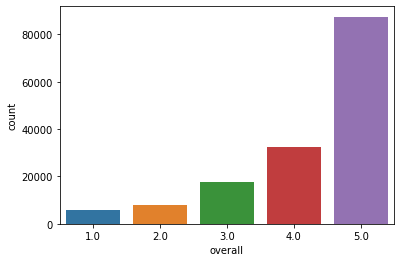

In [12]:
# look at ratings 
sns.countplot(data=df, x='overall')
plt.show()


In [13]:
# remove neutral ratings -> only need negative and postive 
df = df[df['overall'] != 3]
# show new shape of data -> shouldn't be much of a change 
df.shape

(133740, 2)

In [14]:
# convert 1 through 2 to a 0, negative review 
# convert 4 through 5 to 1, positive review 
def label(i):
    return 1 if i>=4 else 0
df['label'] = df['overall'].apply(label)
# look at positive and negative sentiments 0 is negative, 1 is positive 
df['label'].value_counts()

1    120044
0     13696
Name: label, dtype: int64

In [15]:
# remove rating column, as we have label now 
df = df.drop(['overall'], axis=1)


In [16]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('',text)

def preprocess_text(text):
      
    t = remove_tags(text) # removes html tags 
    
    t = re.sub('[^a-zA-Z]', ' ', t) # remove punctiation and numbers
    
    t = re.sub(r'\s+[a-zA-Z]\s', ' ', t ) # remove single character 
    
    t = re.sub(r'\s+', ' ', t) # remove multiple empty spaces 
    
    return t 
    
# new column is cleaned version of original review 
df['final_review'] = df['reviewText'].apply(lambda x: preprocess_text(x)) 
df.head(1) # 

,reviewText,label,final_review
0,Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,1,Just another flavor of Kit Kat but the taste is unique and bit different The only thing that is bothersome is the price thought it was bit expensive


In [17]:
# lowercase reviews 
df['final_review'] = df['final_review'].astype(str).str.lower()
df.head(1)

,reviewText,label,final_review
0,Just another flavor of Kit Kat but the taste is unique and a bit different. The only thing that is bothersome is the price. I thought it was a bit expensive....,1,just another flavor of kit kat but the taste is unique and bit different the only thing that is bothersome is the price thought it was bit expensive


In [18]:
# remove review column
df = df.drop(['reviewText'], axis=1)


In [19]:
# turn review text into tokens
# new column is token of reviews 
df['token_review'] = df.apply(lambda row: nltk.word_tokenize(row['final_review']), axis=1)
df.head(1)

,label,final_review,token_review
0,1,just another flavor of kit kat but the taste is unique and bit different the only thing that is bothersome is the price thought it was bit expensive,"[just, another, flavor, of, kit, kat, but, the, taste, is, unique, and, bit, different, the, only, thing, that, is, bothersome, is, the, price, thought, it, was, bit, expensive]"


In [20]:
# stopwords to remove invaluable words 
stopwords = nltk.corpus.stopwords.words('english') 
#print a list a some of the invaluable words
print(stopwords[:15])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours']


In [21]:
# remove stopwords from token_review 
def remove_stopwords(text):
    t = [word for word in text if word not in stopwords]
    return t
# new column is updated token review, removing all invaluable words 
df['no_stopwords'] = df['token_review'].apply(lambda x: remove_stopwords(x))
df.head(1)

,label,final_review,token_review,no_stopwords
0,1,just another flavor of kit kat but the taste is unique and bit different the only thing that is bothersome is the price thought it was bit expensive,"[just, another, flavor, of, kit, kat, but, the, taste, is, unique, and, bit, different, the, only, thing, that, is, bothersome, is, the, price, thought, it, was, bit, expensive]","[another, flavor, kit, kat, taste, unique, bit, different, thing, bothersome, price, thought, bit, expensive]"


In [22]:
# drop token review 
df = df.drop(['token_review'], axis=1)
# update final review to stopwords into str 
df['final_review'] = df['no_stopwords'].apply(lambda x: ' '.join(x))
# drop stopwords 
df = df.drop(['no_stopwords'], axis=1)
df.head()

,label,final_review
0,1,another flavor kit kat taste unique bit different thing bothersome price thought bit expensive
2,1,really good great gift fan green tea expensive purchase candy across sea
3,1,never curious see like smooth great subtle good flavor ordering plan make routine
4,1,looking forward trying hearing popular japan among kit kat fans well recommend ordering warm weather melt become smushy ordered mine right summer began bit mushy let solidify room temp afterwards tried tasted fine expecting stronger green tea matcha flavor actually quite subtle outer coating creamy overly sugary liked overall say insanely good definitely yummy treat
5,1,kit kats good looking strong green tea flavor disappointed green tea flavor subtle


In [23]:
# lemmetize, converts  words to a base word(Finally, Final = Fina)
wordnet_l = WordNetLemmatizer()
# update final review 
df['final_review'] = df['final_review'].apply(wordnet_l.lemmatize)
df.head(1)

,label,final_review
0,1,another flavor kit kat taste unique bit different thing bothersome price thought bit expensive


In [24]:
# stemming, removes letters from word (populated, popul)
ps = PorterStemmer()
# update final review 
df['final_review'] = df.apply(lambda row: ps.stem(row['final_review']), axis=1)
df.head()


,label,final_review
0,1,another flavor kit kat taste unique bit different thing bothersome price thought bit expens
2,1,really good great gift fan green tea expensive purchase candy across sea
3,1,never curious see like smooth great subtle good flavor ordering plan make routin
4,1,looking forward trying hearing popular japan among kit kat fans well recommend ordering warm weather melt become smushy ordered mine right summer began bit mushy let solidify room temp afterwards tried tasted fine expecting stronger green tea matcha flavor actually quite subtle outer coating creamy overly sugary liked overall say insanely good definitely yummy treat
5,1,kit kats good looking strong green tea flavor disappointed green tea flavor subtl


[('like', 79278), ('good', 64939), ('taste', 58242), ('flavor', 52784), ('coffee', 45996), ('one', 45520), ('great', 43487), ('tea', 38264), ('would', 33003), ('product', 32279), ('really', 30555), ('love', 29203), ('use', 27595), ('much', 26319), ('get', 25993), ('also', 25353), ('little', 25263), ('chocolate', 24378), ('make', 23344), ('sugar', 23275)]


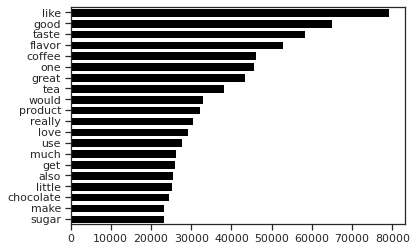

In [25]:
# find most common word 
n_common = 20 
all_words = " ".join(r for r in df.final_review)
words = nltk.word_tokenize(all_words)
fd = FreqDist(words)
top_x = fd.most_common(n_common)
fdist = pd.Series(dict(top_x))
sns.set_theme(style='ticks')
sns.barplot(y=fdist.index, x=fdist.values, color='black')
print(fd.most_common(n_common))
plt.show()


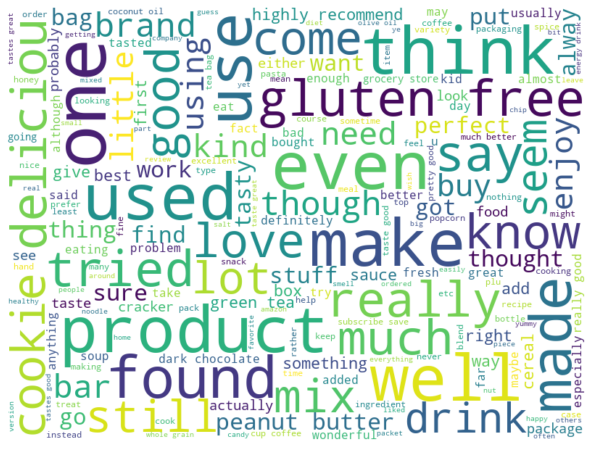

In [26]:
# create a word cloud of most common words 
all_words =" ".join(r for r in df.final_review)
wordcloud = WordCloud(width=800, 
                     height=600, 
                     random_state=2, 
                      background_color='white',
                     max_font_size=100).generate(all_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [27]:
# review what data looks like after cleaning 
df.sample(5, random_state=0) # 5 random rows of data 


,label,final_review
83293,1,although much drinkable vitamin benefits eboost drink packets include ease use great taste fact encourage hydrate vitamin benefits course personally buy whole improve focus boost performance thing like americans lacking vitamins minerals drinking help acai pomegranate delicious sweet sour overwhelmingly fake fruity flavoured recommend drinking cold closer gets room temp taste vitamins ice hardly taste healthiness love simply slender packs easy carry bag pocket etc toss desk drawer office love eco factor single serve packs general took solace seeing eboost member planet least giving back agree earlier reviews mixability foam etc although bother nearly much others also mixed oz water fine fact better opinion
55223,1,really nice snacks come individually wrapped quite pleasant although bit reminiscent fruit filled pop tart think crispier apple cinnamon fruit filling tasty well spiced keep desk reach want nice healthy snack nutritionally zero grams trans fat zero mg cholesterol many calories nice snack tide texture nice crunchy fruit filling tasty individual packaging makes convenient portable delectable crunchy treat
58098,1,eating gluten free two years tried many products pamela products always surpasses competition mix produced wonderfully tasty dense bread followed instructions oven baking exactly turned great allowed loaf cool completely flipped sliced thin serrated knife flash freezing preserve integrity bread add convenience meal time glad found bread mix pamela bread delicious simple make wave glad farewell light bread yeast rol
121756,1,kellogg special granola bar chocolate peanut butter ok snack bar hence stars fiber protein per bar good snack tide hunger binges expecially true trying lose weight maintain present weight size total carbs per bar great source energy prior working dislike snack bar saturated fat sugar contents respectively per bar try shy away food contains amount sat fat beyond sugar contents beyond per serving control fat sugar intakes eating beyond bars snack bar seemed unhealthy side taste great however unique blend chocolate peanut butter try overdo
131661,1,wish time make baby food home made meal brand one go options part use ingredients combinations never would pumpkin apricot peach butternut squash maple cinnamon ricotta smells good looking recipes grown ups winners course tomato corn option soundly rejected littling generally good eater others probably eat often offer butternut squash one mentioned big winner every baby different probably best served finding store sells individual pouches try start investing bulk buys healthy organic babyfood resealable pouches great off


In [28]:
# original was 151k 
df.shape

(133740, 2)

In [29]:
# to save memory and time going to truncate the data by 30% 
print(133740 * 0.7)

93618.0


In [30]:
# updated dataframe is now only 70% of the original cleaned dataframe, using random samples 
df = df.sample(93600, random_state=0) # 70%  random rows of data 

In [31]:
# export cleaned data to local csv 
df.to_csv('D213_Task2_Clean.csv')

In [32]:
# split data 
X = df['final_review']
y = df['label']

In [33]:
# was having issues with loss = nan so checking before model 
print(X.isnull().any())
print(y.isnull().any())

False
False


In [34]:
# splitting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

X_train Shape: (65520,)
X_test Shape: (28080,)
y_train Shape: (65520,)
y_test Shape: (28080,)


In [35]:
# tokenize X_train and X_test again 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
# encoding 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [36]:
# now X_train and X_test are numeric values 
X_train[:3]

[[30, 51, 315, 65, 343, 1012, 466, 25, 68, 27, 2339],
 [121,
  510,
  2907,
  232,
  2394,
  157,
  1819,
  1,
  862,
  1654,
  190,
  157,
  862,
  1654,
  15,
  1472,
  1729],
 [39, 141, 2460, 1833, 522, 27, 26, 715, 1164, 39, 763]]

In [37]:
# padding sequence, review is only 200 max 
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)
np.set_printoptions(threshold=np.inf)
X_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [38]:
# the size of vocab, which will be the input for embedding layer 
vocab_size = len(tokenizer.word_index) + 1 # adding 1 because of reserved 0 index 
print('Vocab Size: ', vocab_size)

Vocab Size:  48472


In [39]:
# having issues with loss = nan, so checking before model 
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())
print(np.isnan(y_train).sum())
print(np.isnan(y_test).sum())

0
0
0
0


In [40]:

# function for the model -> parameters mostly deal with numeric values for the models 
# easier to edit throughout analysis 
def model(X_train, X_test, y_train, y_test, dropout, output_dim, max_len, dense1, dense2, n_epochs, batch_n):
  model = Sequential() # Define sequential model 
  callback = EarlyStopping(monitor='val_loss', patience=6)
  model.add(Embedding(input_dim=vocab_size, output_dim=output_dim,input_length=max_len)) # first hidden layer, input is vocab size
  model.add(GlobalAveragePooling1D()) # Computes a single avg value for each input
  model.add(Dense(dense1, activation='relu')) # First hidden layer 
  model.add(Dropout(dropout)) # helps prevent overfitting
  model.add(Dense(dense2, activation='relu')) # second hidden layer 
  model.add(Dense(1, activation='sigmoid')) # final layer, output is 0 or 1 
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compile model 
  print(model.summary()) # print summary 
  details = model.fit(X_train, y_train, batch_size=batch_n, validation_split=0.2, epochs=n_epochs, callbacks=[callback]) # fit the model 

  
  loss, accuracy = model.evaluate(X_test, y_test.values)
  print('Accuracy: %f' % (accuracy*100))
  return model, details # return the model and details 

# to plot accuracy vs val_accuracy 
def plot_model(details):
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.plot(details.history['accuracy'], label='Accuracy')
  plt.plot(details.history['val_accuracy'], label='Validation_Accuracy')
  plt.legend(loc='best')
  plt.figure(figsize=(16,8))
  plt.subplot(1,2,2)
  plt.plot(details.history['loss'], label='Loss')
  plt.plot(details.history['val_loss'], label='Validation_Loss')
  plt.legend(loc='best')
  plt.show()

In [41]:
# run model 
model, details = model(X_train, X_test, y_train, y_test, 0.2, 20, 200, 100, 50 , 5, 225)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 20)           969440    
                                                                 
 global_average_pooling1d (G  (None, 20)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 100)               2100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                        

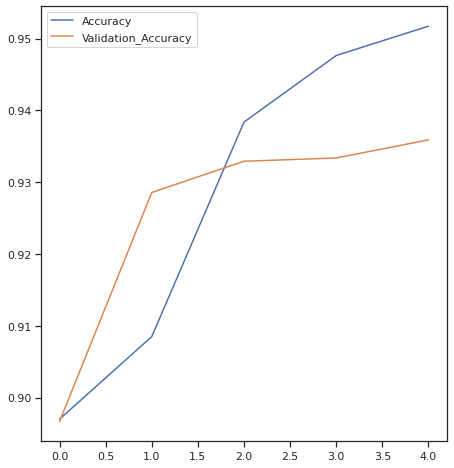

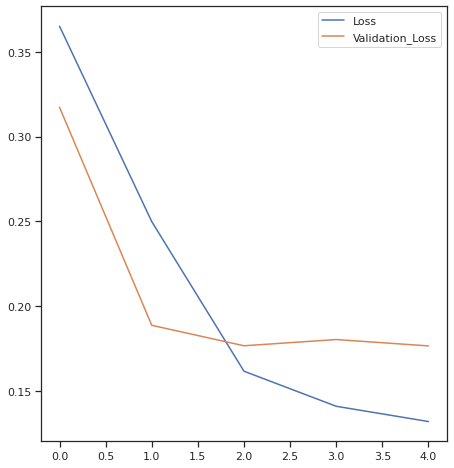

In [42]:
# plot the accuracy vs val
plot_model(details)

In [43]:
# function to predict reviews 
def predict_sentiment(text, model):
  tw = tokenizer.texts_to_sequences([text]) # token new review 
  tw = pad_sequences(tw, maxlen=200) # pad new token, must equal the length as original model 
  prediction = model.predict(tw).round().item() # prediction is 1 or 0 
  if prediction < 1: 
    print('Predicted label:', [prediction], 'Negative Sentiment')
  else:
    print('Predicted label:', [prediction], 'Positive Sentiment')


In [44]:
test_sentence1 = 'I enjoyed the tea, it was very good' # positive 
predict_sentiment(test_sentence1, model)

1/1 [==============================] - 0s 78ms/step
Predicted label: [1.0] Positive Sentiment


In [45]:
test_sentence2 = 'I didnt like the tea, it tasted gross' # negative 
predict_sentiment(test_sentence2, model)

1/1 [==============================] - 0s 16ms/step
Predicted label: [0.0] Negative Sentiment


In [46]:

test_sentence3 = 'The price was very high, but it was excellent' # mixed review, overall good 
predict_sentiment(test_sentence3, model)

1/1 [==============================] - 0s 16ms/step
Predicted label: [1.0] Positive Sentiment


In [47]:
test_sentence4 = 'The texture was horrible, but the taste was okay. Would not recommend ' # mixed review, overall negative 
predict_sentiment(test_sentence4, model)

1/1 [==============================] - 0s 15ms/step
Predicted label: [0.0] Negative Sentiment


In [48]:
json_model = model.to_json()
with open('./sentiment_model.json', 'w') as file:
  file.write(json_model)

  model.save_weights('/sentiment_model_weights.h5')